# TRABAJO PRÁCTICO I (Media Materia)

Grupo 16:
* Pedro bonafe
* Aldana Ruscitti

## Librerías

In [30]:
%pip install torch
%pip install torchvision
%pip install torchsummary
%pip install pandas_profiling
%pip install sweetviz 
%pip install scikit-learn
%pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is a

In [80]:
import numpy as np
import pandas as pd
import torch
import tqdm
import sweetviz as sv


import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from keras import layers, models
import torch.optim as optim

from sklearn import datasets
from sklearn.model_selection import train_test_split

## Introducción y EDA

El dataset que usaremos el el dataset de Indicadores de Diabetes de Kaggle. El repositorio trae tres datasets, en este caso utilizaremos el 2 y el 3 que poseen la misma información solo que el 2 posee 70692 datos con balanceo y el 3 posee 253680 datos pero desbalanceados. El 1 decidimos no utilizarlo ya que tiene 3 clases en la variable target Diabetes_012  (diabetes, prediabetes o no_diabetes) mientras que los otros dos poseen ambos 2 clases en la variable target Diabetes_binary  (diabetes/prediabetes y no_ diabetes). 

Decidimos utilizar los dos a fin de evaluar el comportamiento de la red con un dataset balanceado vs uno desbalancedo


In [468]:
df_balanced = pd.read_csv("dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_balanced

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


En el reporte obtenido a continuación vamos a poder observar una pequeña inspección del dataset. Lo mismo se realiza para el dataframe desbalanceado.

In [469]:
analyze_report = sv.analyze(df_balanced)
analyze_report.show_html('results/df_balanced_EDAreport.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

/opt/homebrew/lib/python3.11/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
/opt/homebrew/lib/python3.11/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
/opt/homebrew/lib/python3.11/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):


Report results/df_balanced_EDAreport.html was generated.


Insights:
* La variable target esta balanceada
* Las clases estan bastante limpias, no hay datos nulos
* BMI esta sesgada a la derecha pero parecieran ser valores reales

In [470]:
df_imbalanced = pd.read_csv("dataset/diabetes_binary_health_indicators_BRFSS2015.csv")
df_imbalanced

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [19]:
analyze_report = sv.analyze(df_imbalanced)
analyze_report.show_html('results/df_imbalanced_EDAreport.html', open_browser=False)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report results/df_imbalanced_EDAreport.html was generated.


Insights:
* La variable target esta muy desbalanceada
* Las clases estan bastante limpias, no hay datos nulos
* BMI esta sesgada a la derecha pero parecieran ser valores reales
* Como no tiene un metodo de balanceo aplicado la diferencia entre clases se traslada al resto de las variables categoricas generando lo mismo.

## Red Neuronal Simple

### Dataset Balanceado

In [504]:
#Semilla
seed = 10

In [505]:
# Separar X e y
X = df_balanced.drop('Diabetes_binary',axis=1).values
y = df_balanced['Diabetes_binary'].values

In [506]:
# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

In [507]:
X_train.shape

(49484, 21)

#### Prueba con Tensorflow

Ajustamos la forma de entrada para que coincida con el número de características en los datos.

In [508]:
input_shape = (X_train.shape[1], )

Para esta arquitectura vamos a utilizar un modelo de 2 capa ocultas de 4 y 2 neuronas con función de activación relu. Nuestra capa de clasificación solo tendrá 1 neurona, puesto que es suficiente para un problema de clasificación binaria y tendrá una función de activación sigmoid

Finalmente, el modelo será compilado con el optimizador rmsprop y como función de perdida usaremos binary_crossentropy la cual funciona muy bien para problemas de clasificación binaria, y como medida de desempeño usaremos accuracy

In [509]:
def architecture(model: models.Sequential, input_shape) -> models.Sequential:
    model.add(layers.Dense(4, activation="relu", input_shape=input_shape))
    model.add(layers.Dense(2, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    return model

model_tf = models.Sequential()
model_tf = architecture(model_tf, input_shape)
model_tf.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [510]:
history = model_tf.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/100
97/97 [==============================] - 1s 2ms/step - loss: 0.6932 - acc: 0.5003 - val_loss: 0.6932 - val_acc: 0.4973
Epoch 2/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6931 - acc: 0.5002 - val_loss: 0.6931 - val_acc: 0.5027
Epoch 3/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.5011 - val_loss: 0.6932 - val_acc: 0.4973
Epoch 4/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.5014 - val_loss: 0.6932 - val_acc: 0.4973
Epoch 5/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.5014 - val_loss: 0.6932 - val_acc: 0.4973
Epoch 6/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.4998 - val_loss: 0.6932 - val_acc: 0.4973
Epoch 7/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.5014 - val_loss: 0.6932 - val_acc: 0.4973
Epoch 8/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6932 - a

332/332 [==============================] - 0s 823us/step - loss: 0.6932 - acc: 0.4961
[0.6931871771812439, 0.4961335361003876]


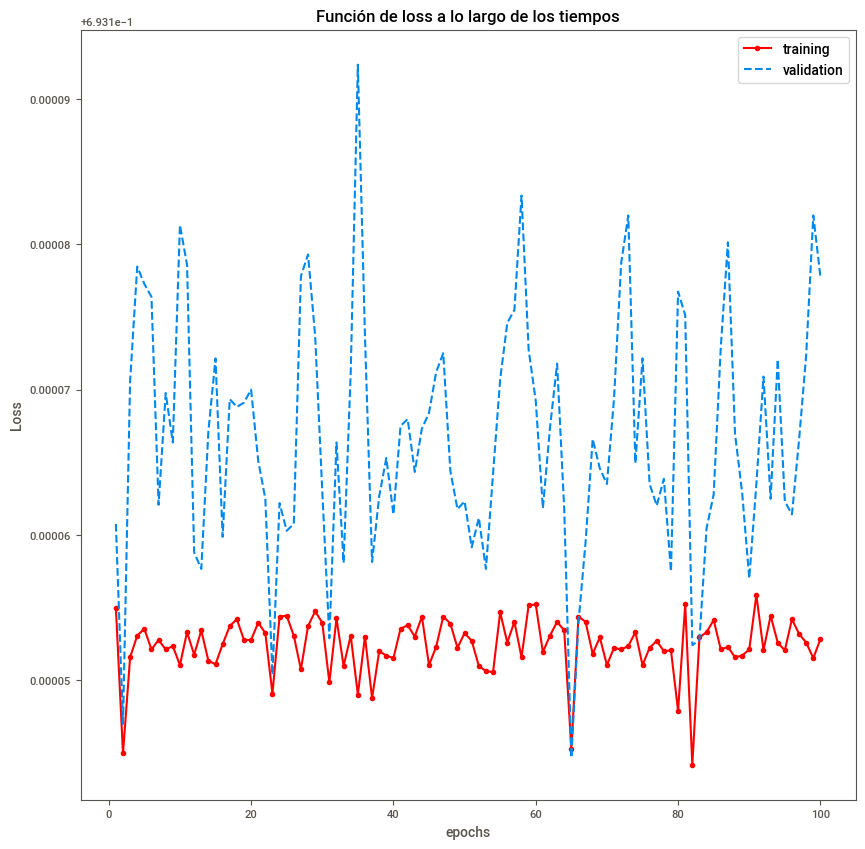

In [511]:
results = model_tf.evaluate(X_test, y_test)
print(results)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
fig = plt.figure(figsize=(10, 10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o-r', label='training')
plt.plot(epoch, val_loss_values, '--', label='validation')
plt.title("Función de loss a lo largo de los tiempos")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

#### Prueba con Torch y Entropy Loss Binaria Cruzada

Vamos a mantener 2 capa ocultas pero con 4 y 8 neuronas con función de activación relu y una capa de clasificación con solo 1 neurona con función de activación sigmoid tilizando una función de pérdida para clasificación binaria como es Entropy Loss Binaria Cruzada

In [512]:
# Convertir los datos en tensores de PyTorch
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
y_train_conv = y_train_tensor.unsqueeze(1)  # Agregar una dimensión
y_train_conv = y_train_conv.float()  # Convertir a tipo Float

X_val_tensor = torch.Tensor(X_val)
y_val_tensor = torch.LongTensor(y_val)
y_val_conv = y_val_tensor.unsqueeze(1)
y_val_conv = y_val_conv.float()  # Convertir a tipo Float

X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.LongTensor(y_test)
y_test_conv = y_test_tensor.unsqueeze(1)
y_test_conv = y_test_conv.float()  # Convertir a tipo Float

In [515]:
y_val_conv.shape

torch.Size([10604, 1])

In [516]:
class DiabetesClassifier(nn.Module):
    def __init__(self, input_features = 21, hidden_layer_1=4, hidden_layer_2=8, output_features=1):
        super().__init__()
        self.fully_connected_1 = nn.Linear(input_features, hidden_layer_1)
        self.fully_connected_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.output = nn.Linear(hidden_layer_2, output_features)

    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = torch.sigmoid(self.output(x)) 
        return x

In [517]:
torch.manual_seed(seed)

model_bcel = DiabetesClassifier()

criterion = nn.BCELoss() # Función de pérdida para clasificación binaria

optimizer = torch.optim.Adam(model_bcel.parameters(), lr=0.1)


In [518]:
model_bcel.parameters

<bound method Module.parameters of DiabetesClassifier(
  (fully_connected_1): Linear(in_features=21, out_features=4, bias=True)
  (fully_connected_2): Linear(in_features=4, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)>

In [519]:
#epoch = Un entrenamiento sobre todo el dataset
epochs = 100

train_losses = []
val_losses = []

for epoch in tqdm.trange(epochs):
    epoch+=1

    # Foward pass y obtener la prediccion
    y_pred = model_bcel.forward(X_train_tensor)

    # Calcular la loss de cada epoca
    loss_train = criterion(y_pred, y_train_conv)
    train_losses.append(loss_train.item())

    # No queremos imprimir los resultados de las 100 epocas asi que podemos poner una condicion
    if epoch%10 == 1:
       print(f'epoch: {epoch:2}  loss: {loss_train.item():10.8f}')

    #optimizer.zero_grad() Setea todos los gradientes en cero, sino se acumulan
    # y estariamos usando valores de gradiente que ya usamos previamente
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step() #Actualiza todos los parametros del modelo (pesos y biases)

    with torch.no_grad():
        # Foward pass y obtener la prediccion
        y_pred_val = model_bcel.forward(X_val_tensor)

        # Calcular la loss de cada epoca
        loss_val = criterion(y_pred_val, y_val_conv)
        val_losses.append(loss_val.item())

 30%|███       | 30/100 [00:00<00:00, 150.74it/s]

epoch:  1  loss: 0.70599890
epoch: 11  loss: 0.66522276
epoch: 21  loss: 0.53974259
epoch: 31  loss: 0.52617043


 66%|██████▌   | 66/100 [00:00<00:00, 169.43it/s]

epoch: 41  loss: 0.52030468
epoch: 51  loss: 0.51840645
epoch: 61  loss: 0.51097322
epoch: 71  loss: 0.51194191


100%|██████████| 100/100 [00:00<00:00, 165.20it/s]

epoch: 81  loss: 0.52432150
epoch: 91  loss: 0.51049954


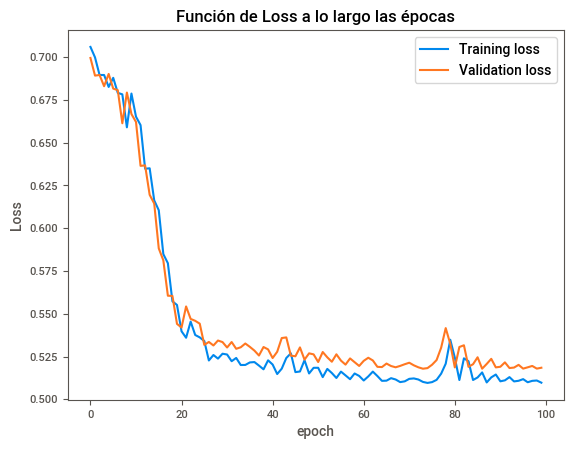

In [520]:
plt.title('Función de Loss a lo largo las épocas')
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [521]:
# Evaluamos el modelo en el conjunto de validación
with torch.no_grad():
    y_pred = model_bcel.forward(X_val_tensor) #Hacemos una inferencia sobre el conjunto de datos
    loss = criterion(y_pred, y_val_conv)
print(f'Valor de Loss en el conjunto de validación: {loss:.8f}')

Valor de Loss en el conjunto de validación: 0.51843530


In [522]:
## Este es un ejemplo visual donde comparamos ejemplo, el valor predicho con la pertenencia a la clase.

correct = 0
with torch.no_grad():
    for i,data in enumerate(X_val_tensor):
        y_pred = model_bcel.forward(data)

        # Mientras más alto es el valor más alta es la probabilidad de que pertenezca a la clase
        print(f'Ejemplo {i+1:2}.) {str(y_pred):38}  {y_val_conv[i]}')

        if y_pred.argmax().item() == y_val_conv[i]:
            correct += 1
print(f'\n{correct} out of {len(y_val_conv)} = {100*correct/len(y_val_conv):.2f}% correct')

Ejemplo  1.) tensor([0.1734])                        tensor([0.])
Ejemplo  2.) tensor([0.7348])                        tensor([1.])
Ejemplo  3.) tensor([0.9869])                        tensor([0.])
Ejemplo  4.) tensor([0.9087])                        tensor([1.])
Ejemplo  5.) tensor([0.8181])                        tensor([1.])
Ejemplo  6.) tensor([0.1214])                        tensor([0.])
Ejemplo  7.) tensor([0.1656])                        tensor([0.])
Ejemplo  8.) tensor([0.8585])                        tensor([1.])
Ejemplo  9.) tensor([0.1458])                        tensor([0.])
Ejemplo 10.) tensor([0.0930])                        tensor([0.])
Ejemplo 11.) tensor([0.5295])                        tensor([0.])
Ejemplo 12.) tensor([0.5817])                        tensor([0.])
Ejemplo 13.) tensor([0.8345])                        tensor([1.])
Ejemplo 14.) tensor([0.0930])                        tensor([0.])
Ejemplo 15.) tensor([0.6226])                        tensor([0.])
Ejemplo 16

No se obtuvieron muy buenos resultados en las predicciones. Vamos a probar con otra funcion de perdida.

#### Prueba con Torch y CrossEntropyLoss

Vamos a mantener 2 capa ocultas pero con 8 y 4 neuronas con función de activación relu y una capa de clasificación con 2 neuronas con funcion activación propia utilizando una función de pérdida para clasificación binaria como es Cross Entropy Loss.

In [523]:
class DiabetesClassifier(nn.Module):
    def __init__(self, input_features = 21, hidden_layer_1=8, hidden_layer_2=4, output_features=2):
        super().__init__()
        self.fully_connected_1 = nn.Linear(input_features, hidden_layer_1)
        self.fully_connected_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.output = nn.Linear(hidden_layer_2, output_features)

    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = self.output(x)
        return x

In [524]:
torch.manual_seed(seed)

model_cel = DiabetesClassifier()

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model_cel.parameters(), lr=0.1)

In [525]:
#epoch = Un entrenamiento sobre todo el dataset
epochs = 100

train_losses = []
val_losses = []

for epoch in tqdm.trange(epochs):
    epoch+=1

    # Foward pass y obtener la prediccion
    y_pred = model_cel.forward(X_train_tensor)

    # Calcular la loss de cada epoca
    loss_train = criterion(y_pred, y_train_tensor)
    train_losses.append(loss_train.item())

    # No queremos imprimir los resultados de las 100 epocas asi que podemos poner una condicion
    if epoch%10 == 1:
       print(f'epoch: {epoch:2}  loss: {loss_train.item():10.8f}')

    #optimizer.zero_grad() Setea todos los gradientes en cero, sino se acumulan
    # y estariamos usando valores de gradiente que ya usamos previamente
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step() #Actualiza todos los parametros del modelo (pesos y biases)

    with torch.no_grad():
        # Foward pass y obtener la prediccion
        y_pred_val = model_cel.forward(X_val_tensor)

        # Calcular la loss de cada epoca
        loss_val = criterion(y_pred_val, y_val_tensor)
        val_losses.append(loss_val.item())

 19%|█▉        | 19/100 [00:00<00:00, 96.20it/s]

epoch:  1  loss: 0.80435807
epoch: 11  loss: 0.69642454


 41%|████      | 41/100 [00:00<00:00, 100.77it/s]

epoch: 21  loss: 0.69317865
epoch: 31  loss: 0.69330311
epoch: 41  loss: 0.69332337


 52%|█████▏    | 52/100 [00:00<00:00, 99.15it/s] 

epoch: 51  loss: 0.69323450
epoch: 61  loss: 0.69317937


 79%|███████▉  | 79/100 [00:01<00:00, 57.68it/s]

epoch: 71  loss: 0.69315642


 97%|█████████▋| 97/100 [00:01<00:00, 70.59it/s]

epoch: 81  loss: 0.69314760
epoch: 91  loss: 0.69314474


100%|██████████| 100/100 [00:01<00:00, 75.07it/s]


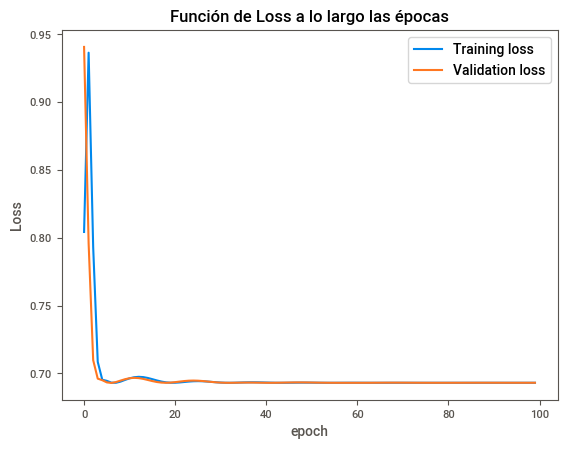

In [526]:
plt.title('Función de Loss a lo largo las épocas')
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [527]:
# Evaluamos el modelo en el conjunto de validación
with torch.no_grad():
    y_pred = model_cel.forward(X_val_tensor) #Hacemos una inferencia sobre el conjunto de datos
    loss = criterion(y_pred, y_val_tensor)
print(f'Valor de Loss en el conjunto de validación: {loss:.8f}')

Valor de Loss en el conjunto de validación: 0.69316024


In [528]:
## Este es un ejemplo visual donde comparamos ejemplo, el valor predicho con la pertenencia a la clase.

correct = 0
with torch.no_grad():
    for i,data in enumerate(X_val_tensor):
        y_pred = model_cel.forward(data)

        # Mientras más alto es el valor más alta es la probabilidad de que pertenezca a la clase
        print(f'Ejemplo {i+1:2}.) {str(y_pred):38}  {y_val_tensor[i]}')

        if y_pred.argmax().item() == y_val_tensor[i]:
            correct += 1
print(f'\n{correct} out of {len(y_val_tensor)} = {100*correct/len(y_val_tensor):.2f}% correct')

Ejemplo  1.) tensor([0.1584, 0.1544])                0
Ejemplo  2.) tensor([0.1584, 0.1544])                1
Ejemplo  3.) tensor([0.1584, 0.1544])                0
Ejemplo  4.) tensor([0.1584, 0.1544])                1
Ejemplo  5.) tensor([0.1584, 0.1544])                1
Ejemplo  6.) tensor([0.1584, 0.1544])                0
Ejemplo  7.) tensor([0.1584, 0.1544])                0
Ejemplo  8.) tensor([0.1584, 0.1544])                1
Ejemplo  9.) tensor([0.1584, 0.1544])                0
Ejemplo 10.) tensor([0.1584, 0.1544])                0
Ejemplo 11.) tensor([0.1584, 0.1544])                0
Ejemplo 12.) tensor([0.1584, 0.1544])                0
Ejemplo 13.) tensor([0.1584, 0.1544])                1
Ejemplo 14.) tensor([0.1584, 0.1544])                0
Ejemplo 15.) tensor([0.1584, 0.1544])                0
Ejemplo 16.) tensor([0.1584, 0.1544])                0
Ejemplo 17.) tensor([0.1584, 0.1544])                0
Ejemplo 18.) tensor([0.1584, 0.1544])                1
Ejemplo 19

## Optimización de hiperparametros

#### Optimización en el modelo de Tensorflow

In [549]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import ParameterGrid
from keras import optimizers

Arquitectura modificada:

In [551]:
def architecture(hidden_units_layer1=4, hidden_units_layer2=4, learning_rate=0.001, activation='relu'):
    model = models.Sequential()
    model.add(layers.Dense(hidden_units_layer1, activation=activation, input_shape=input_shape))
    model.add(layers.Dense(hidden_units_layer2, activation=activation))
    model.add(layers.Dense(1, activation="sigmoid"))
    
    optimizer = optimizers.RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])
    
    return model

Los parametros a optimizar van a ser la cantidad de neuronas por cada capa, el learning rate y la función de activación a utilizar

In [554]:
param_grid = {
    'hidden_units_layer1': [2, 4, 8, 16],
    'hidden_units_layer2': [2, 4, 8, 16],
    'learning_rate': [0.001, 0.01, 0.1],
    'activation': ['relu', 'tanh', 'sigmoid']
}

In [555]:
cv = StratifiedKFold() #Utilizamos Validación cruzada estratificada
grid_results = [] 
#Realizamos la busqueda
for hidden_units_layer1 in param_grid['hidden_units_layer1']:
    for hidden_units_layer2 in param_grid['hidden_units_layer2']:
        for learning_rate in param_grid['learning_rate']:
            for activation in param_grid['activation']:
                model = architecture(hidden_units_layer1, hidden_units_layer2, learning_rate, activation)
                history = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val), verbose=0)
                score = model.evaluate(X_val, y_val, verbose=0)
                grid_results.append({
                    'hidden_units_layer1': hidden_units_layer1,
                    'hidden_units_layer2': hidden_units_layer2,
                    'learning_rate': learning_rate,
                    'activation': activation,
                    'val_accuracy': score[1]
                })

#Buscamos los mejores parametros
best_params = max(grid_results, key=lambda x: x['val_accuracy'])

print(f"Mejor accuracy: {best_params['val_accuracy']} utilizando {best_params}")

Mejor accuracy: 0.7495284676551819 utilizando {'hidden_units_layer1': 4, 'hidden_units_layer2': 8, 'learning_rate': 0.001, 'activation': 'sigmoid', 'val_accuracy': 0.7495284676551819}


In [556]:
best_hidden_units_layer1 = best_params['hidden_units_layer1']
best_hidden_units_layer2 = best_params['hidden_units_layer2']
best_learning_rate = best_params['learning_rate']
best_activation = best_params['activation']

Creo el modelo:

In [557]:
best_model = models.Sequential()
best_model.add(layers.Dense(best_hidden_units_layer1, activation=best_activation, input_shape=input_shape))
best_model.add(layers.Dense(best_hidden_units_layer2, activation=best_activation))
best_model.add(layers.Dense(1, activation="sigmoid"))

In [558]:
optimizer = optimizers.RMSprop(learning_rate=best_learning_rate)
best_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])

In [559]:
history = best_model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/100
97/97 [==============================] - 1s 2ms/step - loss: 0.6881 - acc: 0.5772 - val_loss: 0.6799 - val_acc: 0.6959
Epoch 2/100
97/97 [==============================] - 0s 982us/step - loss: 0.6704 - acc: 0.6917 - val_loss: 0.6627 - val_acc: 0.6952
Epoch 3/100
97/97 [==============================] - 0s 968us/step - loss: 0.6537 - acc: 0.7003 - val_loss: 0.6456 - val_acc: 0.7024
Epoch 4/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6353 - acc: 0.7098 - val_loss: 0.6269 - val_acc: 0.7074
Epoch 5/100
97/97 [==============================] - 0s 2ms/step - loss: 0.6156 - acc: 0.7167 - val_loss: 0.6072 - val_acc: 0.7124
Epoch 6/100
97/97 [==============================] - 0s 958us/step - loss: 0.5954 - acc: 0.7218 - val_loss: 0.5887 - val_acc: 0.7175
Epoch 7/100
97/97 [==============================] - 0s 966us/step - loss: 0.5762 - acc: 0.7258 - val_loss: 0.5716 - val_acc: 0.7222
Epoch 8/100
97/97 [==============================] - 0s 963us/step - loss: 

332/332 [==============================] - 0s 536us/step - loss: 0.5112 - acc: 0.7473
[0.5111947655677795, 0.7472651600837708]


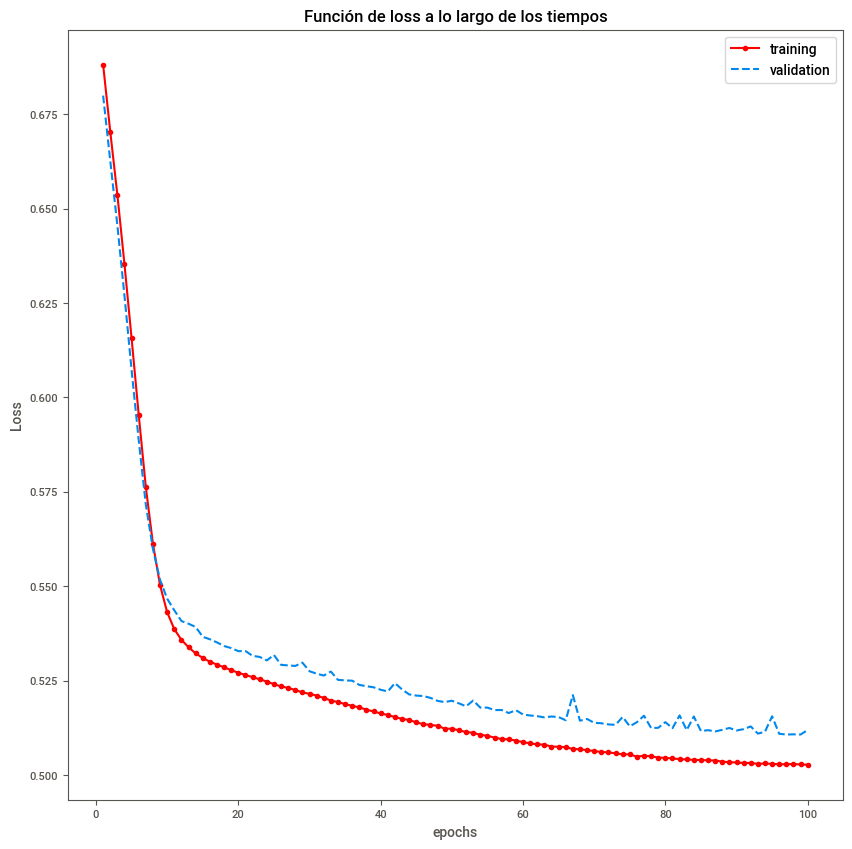

In [560]:
results = best_model.evaluate(X_test, y_test)
print(results)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
fig = plt.figure(figsize=(10, 10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o-r', label='training')
plt.plot(epoch, val_loss_values, '--', label='validation')
plt.title("Función de loss a lo largo de los tiempos")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()